In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

2019-01-14 11:00:13,467 [3907] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
def build_df(dirname, filename):
    filepath = os.path.join(dirname, filename)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel',  '--svhn',
       '--tensorboard', '--validation-size', "--out-dim"
       , 'deepstrom','dense', 
                     "--non-linear", "--non-linearity", "--num-epoch", "--seed",
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation", "--real-nystrom"
            ]
    for c in col_to_delete:
        df = df.drop([c], axis=1)
    return df


In [3]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_svhn_manual/"
FILENAME = "gathered_results.csv"
df = build_df(DIRNAME, FILENAME)

In [4]:
df

--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
0             64        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.949546       39.330530  55029.712368          None  0.948818      16.081715      1547146128
1             64        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.951201       13.137160  19510.202971          None  0.948217       5.798148      1547151328
2             64        1.0    None           0.0001            True         128              False    svhn  chi2_cpd  deepstrom  0.945659       13.560336  20596.134432          None  0.945012       6.227127      1547146278
3            128        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.946659       22.510375  31652.893565          None  0.943810       9.284081      1547154767
4            128        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.951663        8.635733  11740.444501          None  0.943510       3.972991      1547163877
5             64        1.0    None           0.0001            True         128              False    svhn    linear  deepstrom  0.953317       13.220126  19694.963000          None  0.949519       5.923829      1547144137
6            256        1.0    None           0.0001            True         128              False    svhn    linear  deepstrom  0.951114       16.400055  20923.054168          None  0.947616       6.916583      1547144372
7            128        1.0    None           0.0001            True         128              False    svhn    linear  deepstrom  0.952317       22.111420  30232.093894          None  0.944712       9.109023      1547144337
8            256        1.0    None           0.0001            True         128               True    svhn    linear  deepstrom  0.945042        5.956105   6779.550857          None  0.943510       3.000586      1547144521
9            128        1.0    None           0.0001            True         128               True    svhn    linear  deepstrom  0.950893       22.023858  30960.159259          None  0.942608       9.211730      1547144160
10            64        1.0    0.05           0.0001           False         128              False    svhn       rbf  deepstrom  0.955357       14.848691  20662.044947          None  0.951222       6.601924      1547144855
11            64        0.5    0.05           0.0001           False         128              False    svhn       rbf  deepstrom  0.952124       15.315389  31076.918991          None  0.948518       6.570797      1547144798
12            64        0.5    0.05           0.0001           False         128               True    svhn       rbf  deepstrom  0.950854       38.032731  53989.226248          None  0.947316      15.206295      1547146061
13            64        1.0    0.01           0.0001           False         128              False    svhn       rbf  deepstrom  0.954241       35.954652  52797.679379          None  0.946114      14.303495      1547144977
14            64        1.0    0.05           0.0001           False         128               True    svhn       rbf  deepstrom  0.949969       37.301147  53394.026551          None  0.945913      15.007592      1547145863

In [5]:
def get_sorted_acc_for_dataset(df_, name):
    df_dataset = df_[df_["dataset"] == name]
    df_dataset = df_dataset.sort_values(by="val_acc", ascending=False)
    return df_dataset

In [6]:
sorted_ = get_sorted_acc_for_dataset(df, "svhn")
for k in ["rbf", "linear", "chi2_cpd"]:
    sorted_k = sorted_[sorted_["kernel"] == k]
    print(k)
    display(sorted_k)

rbf


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
10            64        1.0    0.05           0.0001           False         128              False    svhn    rbf  deepstrom  0.955357       14.848691  20662.044947          None  0.951222       6.601924      1547144855
11            64        0.5    0.05           0.0001           False         128              False    svhn    rbf  deepstrom  0.952124       15.315389  31076.918991          None  0.948518       6.570797      1547144798
12            64        0.5    0.05           0.0001           False         128               True    svhn    rbf  deepstrom  0.950854       38.032731  53989.226248          None  0.947316      15.206295      1547146061
13            64        1.0    0.01           0.0001           False         128              False    svhn    rbf  deepstrom  0.954241       35.954652  52797.679379          None  0.946114      14.303495      1547144977
14            64        1.0    0.05           0.0001           False         128               True    svhn    rbf  deepstrom  0.949969       37.301147  53394.026551          None  0.945913      15.007592      1547145863

linear


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset  kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
5            64        1.0    None           0.0001            True         128              False    svhn  linear  deepstrom  0.953317       13.220126  19694.963000          None  0.949519       5.923829      1547144137
6           256        1.0    None           0.0001            True         128              False    svhn  linear  deepstrom  0.951114       16.400055  20923.054168          None  0.947616       6.916583      1547144372
7           128        1.0    None           0.0001            True         128              False    svhn  linear  deepstrom  0.952317       22.111420  30232.093894          None  0.944712       9.109023      1547144337
8           256        1.0    None           0.0001            True         128               True    svhn  linear  deepstrom  0.945042        5.956105   6779.550857          None  0.943510       3.000586      1547144521
9           128        1.0    None           0.0001            True         128               True    svhn  linear  deepstrom  0.950893       22.023858  30960.159259          None  0.942608       9.211730      1547144160

chi2_cpd


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
0            64        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.949546       39.330530  55029.712368          None  0.948818      16.081715      1547146128
1            64        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.951201       13.137160  19510.202971          None  0.948217       5.798148      1547151328
2            64        1.0    None           0.0001            True         128              False    svhn  chi2_cpd  deepstrom  0.945659       13.560336  20596.134432          None  0.945012       6.227127      1547146278
3           128        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.946659       22.510375  31652.893565          None  0.943810       9.284081      1547154767
4           128        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.951663        8.635733  11740.444501          None  0.943510       3.972991      1547163877

In [7]:
get_sorted_acc_for_dataset(df, "svhn")

--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
10            64        1.0    0.05           0.0001           False         128              False    svhn       rbf  deepstrom  0.955357       14.848691  20662.044947          None  0.951222       6.601924      1547144855
5             64        1.0    None           0.0001            True         128              False    svhn    linear  deepstrom  0.953317       13.220126  19694.963000          None  0.949519       5.923829      1547144137
0             64        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.949546       39.330530  55029.712368          None  0.948818      16.081715      1547146128
11            64        0.5    0.05           0.0001           False         128              False    svhn       rbf  deepstrom  0.952124       15.315389  31076.918991          None  0.948518       6.570797      1547144798
1             64        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.951201       13.137160  19510.202971          None  0.948217       5.798148      1547151328
6            256        1.0    None           0.0001            True         128              False    svhn    linear  deepstrom  0.951114       16.400055  20923.054168          None  0.947616       6.916583      1547144372
12            64        0.5    0.05           0.0001           False         128               True    svhn       rbf  deepstrom  0.950854       38.032731  53989.226248          None  0.947316      15.206295      1547146061
13            64        1.0    0.01           0.0001           False         128              False    svhn       rbf  deepstrom  0.954241       35.954652  52797.679379          None  0.946114      14.303495      1547144977
14            64        1.0    0.05           0.0001           False         128               True    svhn       rbf  deepstrom  0.949969       37.301147  53394.026551          None  0.945913      15.007592      1547145863
2             64        1.0    None           0.0001            True         128              False    svhn  chi2_cpd  deepstrom  0.945659       13.560336  20596.134432          None  0.945012       6.227127      1547146278
7            128        1.0    None           0.0001            True         128              False    svhn    linear  deepstrom  0.952317       22.111420  30232.093894          None  0.944712       9.109023      1547144337
3            128        1.0    None           0.0001           False         128              False    svhn  chi2_cpd  deepstrom  0.946659       22.510375  31652.893565          None  0.943810       9.284081      1547154767
4            128        1.0    None           0.0001            True         128               True    svhn  chi2_cpd  deepstrom  0.951663        8.635733  11740.444501          None  0.943510       3.972991      1547163877
8            256        1.0    None           0.0001            True         128               True    svhn    linear  deepstrom  0.945042        5.956105   6779.550857          None  0.943510       3.000586      1547144521
9            128        1.0    None           0.0001            True         128               True    svhn    linear  deepstrom  0.950893       22.023858  30960.159259          None  0.942608       9.211730      1547144160

In [8]:
method_names = set(df["network"].values)
kernel_names = set(df["kernel"].values)
nys_size = set(df["--nys-size"].values)
gamma_values = set(df["--gamma"].values)
gamma_values.remove("None")
datasets = set(df["dataset"].values)

logger.debug("Nystrom possible sizes are: {}".format(nys_size))
logger.debug("Datasets: {}".format(datasets))
logger.debug("Kernel functions are: {}".format(kernel_names))
logger.debug("Compared network types are: {}".format(method_names))

2019-01-10 18:38:47,277 [28247] DEBUG    root: Nystrom possible sizes are: {128}
2019-01-10 18:38:47,278 [28247] DEBUG    root: Datasets: {'mnist'}
2019-01-10 18:38:47,280 [28247] DEBUG    root: Kernel functions are: {'rbf', 'chi2_cpd', 'linear'}
2019-01-10 18:38:47,282 [28247] DEBUG    root: Compared network types are: {'deepstrom'}


In [14]:
nb = 5
data = "mnist"
map_k_arg = {
    "rbf": "-R",
    "chi2_cpd": "-C",
    "linear": "-L"
}
for k_name in kernel_names:
    df_k = df[df["kernel"] == k_name]
    df_k_sorted = get_sorted_acc_for_dataset(df_k, data)
#     best_10 = df_k_sorted[:nb]
#     display(best_10)
    for i in range(nb):
#         print(df_k_sorted["--learning-rate"])
        lr = df_k_sorted["--learning-rate"].iloc[i]
        dropout = df_k_sorted["--dropout"].iloc[i]
        l2 = df_k_sorted["--normalize-l2"].iloc[i]
        tanh = df_k_sorted["--tanh-activation"].iloc[i]
        bsize = df_k_sorted["--batch-size"].iloc[i]
        if k_name == "rbf":
            gam = df_k_sorted["--gamma"].iloc[i]
        else:
            gam = None
        msg = "deepstrom", "--" + data, map_k_arg[k_name], "-m 128", "-e 175", "--learning-rate", str(lr), "--dropout", str(dropout), "--normalize-l2" if l2 else "", "--tanh-activation" if tanh else "", "-g " + str(gam) if k_name == "rbf" else "", "-s", str(bsize)
        msg = " ".join(msg)
        msg = msg.split()
        msg = " ".join(msg)
        print(msg)

deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.01 --dropout 0.5 -g 0.1 -s 256
deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.01 --dropout 1.0 -g 0.1 -s 256
deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.001 --dropout 0.5 --tanh-activation -g 0.05 -s 256
deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.01 --dropout 1.0 -g 0.05 -s 64
deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.01 --dropout 0.5 -g 0.01 -s 256
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.01 --dropout 0.5 --normalize-l2 -s 64
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.001 --dropout 1.0 -s 64
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.001 --dropout 0.5 -s 128
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.001 --dropout 0.5 --normalize-l2 -s 128
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.0001 --dropout 0.5 --normalize-l2 --tanh-activation -s 64
deepstrom --mnist -L -m 128 -e 175 --learning-rate 0.01 --dropout 0.5 -s 256
deepstrom --mnist -L -m 128 -e 1

In [17]:
nb_classes_datasets = {
    "svhn": 10,
    "cifar10": 10,
    "mnist": 10,
    "cifar100": 100
}

nb_feature_convs = {
    "svhn": 512,
    "cifar10": 512,
    "mnist": 16,
    "cifar100": 512
}

min_acc = 0
max_acc = 1

In [20]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)
    return
    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

2019-01-08 11:20:44,454 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,491 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,499 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-01-08 11:20:44,508 [29644] DEBUG    matplotlib.font

[0.93309295 0.95592949 0.96063702 0.96895032 0.9672476 ]
[0.94691506 0.93269231 0.96123798 0.96264022 0.96564503]
[0.91977163 0.95873397 0.96444311 0.96033654 0.97455929]
[0.89683494 0.94491186 0.95763221 0.73818109 0.84014423]
[0.92568109 0.95933494 0.95783253 0.94601362 0.96654647]


2019-01-08 11:20:44,585 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmr10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmr10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf') with score of 0.050000
2019-01-08 11:20:44,593 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmtt10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf') with score of 0.050000
2019-01-08 11:20:44,600 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmmi10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmmi10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf') with score of 0.050000
2019-01-08 11:20:44,606 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmb10:s

[0.94900708 0.95731989 0.95997537 0.96089901 0.95774323]
[0.95308651 0.95924415 0.96078356 0.96062962 0.96089901]
[0.78556034 0.95593442 0.95431804 0.95866687 0.91656404]
[0.93053417 0.9619766  0.95701201 0.95604988 0.95839748]
[0.94361915 0.96036022 0.95412562 0.95905172 0.96186115]


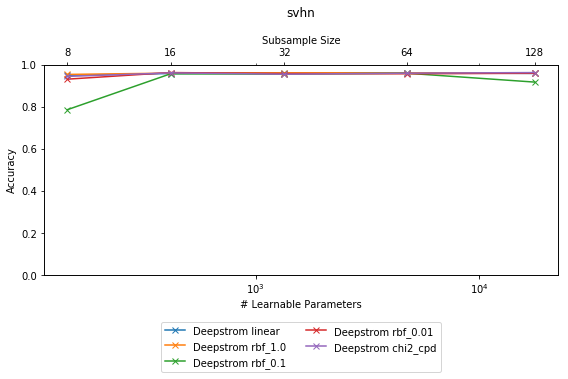

In [23]:
for DATANAME in datasets:
    df_data = df[df["dataset"] == DATANAME]
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        if k_name == "rbf":
            for g_val in gamma_values:
                k_name = "rbf" + "_" + str(g_val)
                df_rbf = df_kernel[df_kernel["--gamma"] == g_val]
                accuracies_kernel = df_rbf["test_acc"]
                subsample_sizes_kernel = df_rbf["--nys-size"].astype(int)
                np_param = (np.square(subsample_sizes_kernel) +  # m x m
                            subsample_sizes_kernel * nb_classes_dataset)  # m x c
                sorted_idx = np.argsort(np_param.values)
                xx = np_param.values[sorted_idx]
                print(accuracies_kernel.values[sorted_idx])
                yy = accuracies_kernel.values[sorted_idx].astype(float)
                ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
        else:
            accuracies_kernel = df_kernel["test_acc"]
            subsample_sizes_kernel = df_kernel["--nys-size"].astype(int)
            np_param = (np.square(subsample_sizes_kernel) +  # m x m
                        subsample_sizes_kernel * nb_classes_dataset)  # m x c
            sorted_idx = np.argsort(np_param.values)
            xx = np_param.values[sorted_idx]
            print(accuracies_kernel.values[sorted_idx])
            yy = accuracies_kernel.values[sorted_idx].astype(float)
            ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")


    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)